## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# initalize the tictactoe environment
env = TicTacToe()

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [6]:
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [7]:
# all possible agent actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [8]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    #Based on decay example
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    
    # generate a random number between 0 an 1 from the probability distribution
    z = np.random.random()
    
    # if value of z is more than epsilon, select the max q-value stored in q_dict for the given state
    # else randomly select an action from all valid actions
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max Q-value for the current state
    else:
        valid_actions = [i for i in env.action_space(state)[0]]
        random_index = random.randrange(len(valid_actions))
        random_action = valid_actions[random_index]
        action = random_action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [9]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [10]:
# Initialise states to be tracked
def initialise_tracking_states():
  
  sample_q_values = [('x-x-x-x-x-x-x-x-x',(1,2)), ('x-1-x-x-x-x-4-x-x',(3,5)), 
                     ('x-1-3-x-x-x-x-x-x',(0,6)), ('x-1-x-x-x-x-x-2-x',(5,9))]
  
  for q_val in sample_q_values:
        state = q_val[0]
        action = q_val[1]
        States_track[state][action] = []
  

In [11]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [13]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [14]:
EPISODES = 4000000            # total no. of episodes
LR = 0.01                     # learning rate
GAMMA = 0.9                   # discount factor

max_epsilon = 1.0             # Greed: 100%
min_epsilon = 0.001           # Min_Greed: 0.1%
decay_rate = 0.000002         # epsilon decay rate
threshold = 2000              # no. of episodes after which states_tracked will be saved
policy_threshold = 30000      # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [16]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    env = TicTacToe() #creating an instance of the class and call environment
    curr_state = env.state
    add_to_dict(curr_state)
    
    terminal = False
    
    while terminal != True:
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        
        #print(curr_state)
        #print(curr_action)
        
        reward, next_state, terminal = env.step(curr_state,curr_action)
        
        next_state1 = Q_state(next_state)
        
        add_to_dict(next_state)
        
        curr_state = next_state
        
        # if the game is not finished
        if terminal != True:
            
            # Gets the action corresponding to max Q-value for the next state
            max_next = max(Q_dict[next_state1],key=Q_dict[next_state1].get) 
            
            # update the q value in q_dict for the current state and action
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state1][max_next])))
                                                      - Q_dict[curr_state1][curr_action])
            
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))
        
        curr_state = next_state
        
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked') 
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

In [18]:
elapsed_time

5313.561435461044

#### Check the Q-dictionary

In [17]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.3123343782445098,
              (0, 3): -1.3096357132427916,
              (0, 5): -1.3121312868258779,
              (0, 7): -1.3112974450965842,
              (0, 9): -1.3193052990569982,
              (1, 1): -1.3136038068486506,
              (1, 3): -1.3110601709882654,
              (1, 5): -1.3094933239555344,
              (1, 7): -1.3117171401050938,
              (1, 9): -1.3097677237871121,
              (2, 1): -1.301254491706222,
              (2, 3): -1.2892177881730968,
              (2, 5): -1.3192939892827977,
              (2, 7): -1.311601190542073,
              (2, 9): -1.3146392329398255,
              (3, 1): 5.560890535053359,
              (3, 3): -1.2544458194259875,
              (3, 5): -1.3207660157862415,
              (3, 7): -1.3108247407180396,
              (3, 9): -1.3004447056898059,
              (4, 1): -1.3094442620390372,
              (4, 3): -1.314308112119724,
              (4, 5)

In [19]:
len(Q_dict)

1868271

In [41]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

# pickup a random state-key from q_dict
random_key = np.random.choice(list(Q_dict.keys()))
print(random_key)

# display the state-action and their corresponding q-values for the random key generated 
print(Q_dict[random_key])

# display sorted
print({k: v for k, v in sorted(Q_dict[random_key].items(), key=lambda item: item[1], reverse=True)})

5-1-2-4-x-x-x-6-7
{(4, 3): 0.1, (4, 9): 0, (5, 3): 0, (5, 9): 0, (6, 3): 0, (6, 9): 0}
{(4, 3): 0.1, (4, 9): 0, (5, 3): 0, (5, 9): 0, (6, 3): 0, (6, 9): 0}


#### Check the states tracked for Q-values convergence
(non-evaluative)

In [0]:
# Write the code for plotting the graphs for state-action pairs tracked

In [47]:
#random_state_action_key = np.random.choice(list(States_track.keys()))
#States_track[random_state_action_key]

{(5, 9): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  -0.01,
  -0.01,
  -0.01,
  -0.01,
  -0.01,
  -0.01,
  -0.01,
  -0.01,
  -0.01,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.0199,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.029701,
  -0.02970

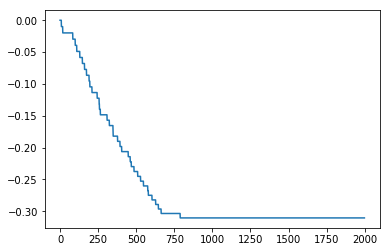

In [59]:
#random_state_action_key
#'x-1-x-x-x-x-x-2-x'
#(5, 9)
#x = np.asarray(range(0,len(States_track['x-1-x-x-x-x-x-2-x'][(5,9)])))

x = range(0,len(States_track['x-1-x-x-x-x-x-2-x'][(5,9)]))
y = States_track['x-1-x-x-x-x-x-2-x'][(5,9)]

plt.plot(x,y)

### Epsilon - decay check

In [0]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

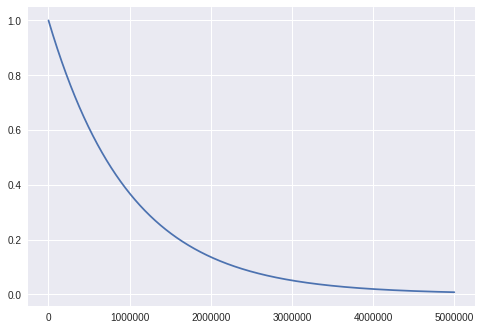

In [0]:
plt.plot(time, epsilon)
plt.show()